In [ ]:
from __future__ import absolute_import, division, print_function
import tensorflow as tf
from tensorflow import keras
import pandas as pd
from sklearn.model_selection import train_test_split

#################    Read data from CSV file   #################
df=pd.read_csv('cardio_train1.csv')

df.drop(['id'],axis=1,inplace=True)

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()
df_scale= preprocessing.MinMaxScaler().fit_transform(df)
df_scale=pd.DataFrame(df_scale, columns=['age','gender','height','weight','ap_hi','ap_lo','cholesterol' ,'gluc','smoke','alco','active','cardio'])

In [ ]:
#df.to_csv('cardio_train1_clean.csv')

In [ ]:
# Separate the target from the data set
X = df_scale.drop(['cardio'], axis=1)
y = df_scale['cardio']

In [ ]:
###################   The Neural Network Model     ####################
train_data, test_data, train_labels, test_labels = train_test_split(X, y, test_size=0.3)

print(train_data.shape)
print(test_data.shape, '\n')

model = keras.Sequential([
    keras.layers.Dense(1000, activation=tf.nn.relu, input_shape=(11,)),
    keras.layers.Dense(1, activation=tf.nn.sigmoid)
])

model.compile(optimizer='adam', 
              # loss='sparse_categorical_crossentropy',
              loss = 'binary_crossentropy',
              #loss='mean_squared_error',
              metrics=['accuracy'])

model.fit(train_data, train_labels, batch_size=32, epochs=50)

test_loss, test_acc = model.evaluate(test_data, test_labels)

print('Test Accuracy:', test_acc, '\n')

(49000, 11)
(21000, 11) 

Epoch 1/50
1532/1532 [==============================] - 2s 1ms/step - loss: 0.6384 - accuracy: 0.6328
Epoch 2/50
1532/1532 [==============================] - 2s 1ms/step - loss: 0.6289 - accuracy: 0.6441
Epoch 3/50
1532/1532 [==============================] - 2s 1ms/step - loss: 0.6263 - accuracy: 0.6500
Epoch 4/50
1532/1532 [==============================] - 2s 1ms/step - loss: 0.6250 - accuracy: 0.6492
Epoch 5/50
1532/1532 [==============================] - 2s 1ms/step - loss: 0.6242 - accuracy: 0.6486
Epoch 6/50
1532/1532 [==============================] - 2s 1ms/step - loss: 0.6227 - accuracy: 0.6504
Epoch 7/50
1532/1532 [==============================] - 2s 1ms/step - loss: 0.6213 - accuracy: 0.6525
Epoch 8/50
1532/1532 [==============================] - 2s 1ms/step - loss: 0.6201 - accuracy: 0.6530
Epoch 9/50
1532/1532 [==============================] - 2s 1ms/step - loss: 0.6193 - accuracy: 0.6546
Epoch 10/50
1532/1532 [==============================] -

# **Evaluation Metrics**

In [ ]:
# Recall, F1-Score, Precision
import numpy as np
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, recall_score, precision_score, classification_report
givenDec = lambda gdVal: float('%.3f' % gdVal) # 1 digit
mlp=MLPClassifier(solver='adam', learning_rate_init = 0.0005, learning_rate = 'adaptive', activation="relu", max_iter=2000, random_state=42)

def evaluate_results(gtestLabels, gTestPred):
    d_accuracy = round(accuracy_score(gtestLabels, gTestPred), 4)
    v_recall = np.round(recall_score(gtestLabels, gTestPred, average = None), 4)
    v_prec = np.round(precision_score(gtestLabels, gTestPred, average = None), 4)
    
    d_recallAvg = np.round(recall_score(gtestLabels, gTestPred, average = 'weighted'), 4)
    d_precAvg = np.round(precision_score(gtestLabels, gTestPred, average = 'weighted'), 4)
    v_summaryReport = classification_report(gtestLabels, gTestPred, digits = 4)

    print('\n')
    print(v_summaryReport)

model = mlp.fit(train_data, train_labels)
test_predictions = model.predict(test_data)
evaluate_results(test_labels, test_predictions)



              precision    recall  f1-score   support

         0.0     0.7063    0.7749    0.7390     10514
         1.0     0.7499    0.6769    0.7115     10486

    accuracy                         0.7260     21000
   macro avg     0.7281    0.7259    0.7253     21000
weighted avg     0.7281    0.7260    0.7253     21000



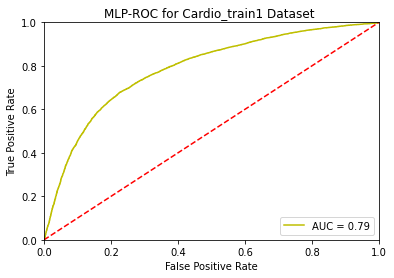

In [ ]:
##### ROC ######################
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.metrics import average_precision_score
from inspect import signature
from sklearn.neural_network import MLPClassifier

mlp.fit(train_data, train_labels)
probs = mlp.predict_proba(test_data)

malignant_probs = probs[:,1]
fpr, tpr, thresholds = roc_curve(test_labels, malignant_probs)
roc_auc = auc(fpr, tpr)

plt.title('MLP-ROC for Cardio_train1 Dataset ')
plt.plot(fpr, tpr, 'y', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()